# EJEMPLOS DE CONTRASTES

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

### Test de una muesta

In [3]:
np.random.seed(2020)

population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 1500000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 1000000)

In [5]:
population_ages = np.append(population_ages1, population_ages2)

(array([5.41000e+02, 9.92200e+03, 5.69550e+04, 1.52475e+05, 2.37750e+05,
        2.38908e+05, 1.68115e+05, 8.68960e+04, 3.50980e+04, 1.34350e+04,
        1.05510e+04, 2.04290e+04, 4.21370e+04, 7.51330e+04, 1.17020e+05,
        1.59330e+05, 1.90675e+05, 2.01720e+05, 1.91042e+05, 1.62145e+05,
        1.24736e+05, 8.61280e+04, 5.53300e+04, 3.18730e+04, 1.69920e+04,
        8.30400e+03, 3.87400e+03, 1.57700e+03, 5.74000e+02, 2.30000e+02,
        7.50000e+01, 2.30000e+01, 7.00000e+00]),
 array([18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42.,
        44., 46., 48., 50., 52., 54., 56., 58., 60., 62., 64., 66., 68.,
        70., 72., 74., 76., 78., 80., 82., 84.]),
 <a list of 33 Patch objects>)

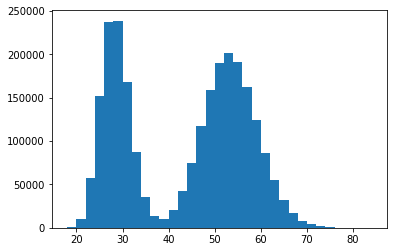

In [14]:
plt.hist(population_ages, bins = 33)

In [15]:
valencia_ages1 = stats.poisson.rvs(loc = 18, mu = 30, size = 30)
valencia_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 20)
valencia_ages = np.append(valencia_ages1, valencia_ages2)

In [18]:
print(population_ages.mean())
print(valencia_ages.mean())

42.9991224
39.46


$$
\left\{
\begin{array}{ll}
H_0: & \mu = 43 \\
H_1: & \mu \neq 43
\end{array}
\right.
$$

donde $\mu$ representa la media de edad de la ciudad de Valencia

In [20]:
stats.ttest_1samp(a = valencia_ages, popmean = population_ages.mean())

Ttest_1sampResult(statistic=-2.1714050303885575, pvalue=0.034771114438177056)

Si queremos hacer por intervalos de confianza

In [32]:
alpha = 0.05
(stats.t.ppf(q = alpha/2, df = len(valencia_ages)-1), stats.t.ppf(q = 1-alpha/2, df = (len(valencia_ages)-1)))

(-2.0095752344892093, 2.009575234489209)

In [33]:
stats.t.cdf(-2.1714, df = len(valencia_ages)-1)
# Esto es el pvalor

0.017385758040821108

In [35]:
sigma = valencia_ages.std()/math.sqrt(len(valencia_ages))
print(sigma)

1.6134955841278276


In [38]:
stats.t.interval(1-alpha, df = len(valencia_ages) -1, 
                 loc = valencia_ages.mean(), scale = sigma)

(36.21755923317902, 42.702440766820985)

Como observamos el intervalo de confianza no contiene el valor 43 por lo que tenemos suficientes evidencias para rechazar $H_0$

### Test de dos poblaciones independientes

In [41]:
np.random.seed(2020)
sagunt_ages1 = stats.poisson.rvs(loc = 18, mu = 33, size = 30)
sagunt_ages2 = stats.poisson.rvs(loc = 18, mu = 13, size = 20)
sagunt_ages = np.append(sagunt_ages1, sagunt_ages2)

$$
\left\{
\begin{array}{ll}
H_0: & \mu_1 = \mu_2 \\
H_1: & \mu_1 \neq \mu_2
\end{array}
\right.
$$

doned $\mu_1$ representa la media de edad de Valencia y $\mu_2$ la edad media de Sagunto

In [43]:
stats.ttest_ind(a = valencia_ages, b = sagunt_ages, equal_var = False)

Ttest_indResult(statistic=-1.5980446624552707, pvalue=0.11328969442894833)

Como el $p_{valor}$ es grande podemos afirmar que no tenemos suficientes evidencias para rechazar $H_0$

### Test de dos poblaciones emparejadas

In [45]:
np.random.seed(100)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -1.25, size = 100)

issue_df = pd.DataFrame({
    'data_before': before,
    'data_after': after,
    'data_change':after-before
})

In [46]:
issue_df.describe()

,data_before,data_after,data_change
count,100.000000,100.000000,100.000000
mean,246.875024,245.273794,-1.601231
std,29.239138,28.860282,5.347108
min,175.385454,182.016288,-16.116577
25%,224.578491,224.637324,-4.794257
50%,248.904910,246.617406,-1.980166
75%,270.287894,266.937200,2.271459
max,311.038227,310.899838,10.243270


$$
\left\{
\begin{array}{ll}
H_0: & \mu_1 = \mu_2 \\
H_1: & \mu_1 \neq \mu_2
\end{array}
\right.
$$

doned $\mu_1$ representa la media de la condición estudiada **ANTES** del tratamiento y $\mu_2$ representa la media de la condicion estudiada **DESPUÉS**

In [47]:
stats.ttest_rel(a = after, b = before)

Ttest_relResult(statistic=-2.9945735001280593, pvalue=0.003471639955998896)

Tenemos evidencias más que significativas para rechazar la $H_0$ ya que el $p_{value}$ es mucho menor que 0.05

### ANALIZANDO ERRORES TIPO 1 Y ERRORES TIPO 2

#### Errores tipo I y de tipo II:
- Error tipo I: $\alpha$, probabilidad de rechazar $H_0$ cuando esta es verdadera
- Error tipo II : $\beta$ probabilidad de aceptar $H_0$ cuando esta es falsa

[]

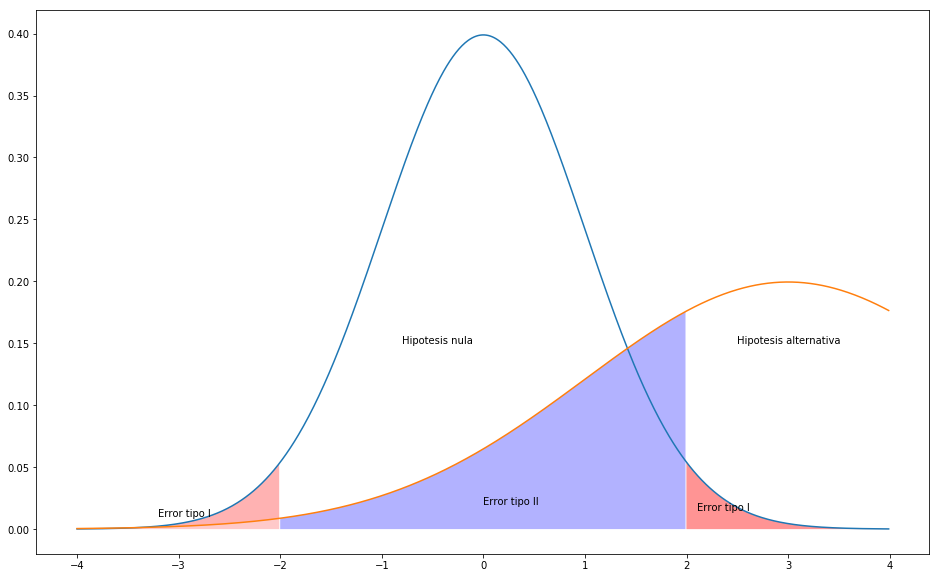

In [61]:
plt.figure(figsize=(16,10))


plt.fill_between(x=np.arange(-4, -2, 0.01), y1 = stats.norm.pdf(np.arange(-4,-2,0.01)), facecolor="red", alpha = 0.3)
plt.fill_between(x=np.arange(-2, 2, 0.01), y1 = stats.norm.pdf(np.arange(-2,2,0.01)), facecolor="white", alpha = 0.3)
plt.fill_between(x=np.arange(2, 4, 0.01), y1 = stats.norm.pdf(np.arange(2,4,0.01)), facecolor="red", alpha = 0.6)


plt.fill_between(x=np.arange(-4, -2, 0.01), y1 = stats.norm.pdf(np.arange(-4,-2,0.01), loc = 3, scale=2), facecolor="white", alpha = 0.3)
plt.fill_between(x=np.arange(-2, 2, 0.01), y1 = stats.norm.pdf(np.arange(-2,2,0.01), loc = 3, scale=2), facecolor="blue", alpha = 0.3)
plt.fill_between(x=np.arange(2, 4, 0.01), y1 = stats.norm.pdf(np.arange(2,4,0.01), loc = 3, scale=2), facecolor="white", alpha = 0.3)

plt.plot(np.arange(-4,4,0.01), stats.norm.pdf(np.arange(-4,4,0.01)))
plt.plot(np.arange(-4,4,0.01), stats.norm.pdf(np.arange(-4,4,0.01), loc=3, scale=2))

plt.text(x=-0.8, y=0.15, s="Hipotesis nula")
plt.text(x=2.5, y=0.15, s="Hipotesis alternativa")
plt.text(x=2.1, y=0.015, s="Error tipo I")
plt.text(x=-3.2, y=0.01, s="Error tipo I")
plt.text(x=0, y=0.02, s="Error tipo II")

plt.plot()

In [64]:
lower_quantile = stats.norm.ppf(0.025)
upper_quantile = stats.norm.ppf(0.975)

low = stats.norm.cdf(lower_quantile, loc = 3, scale = 2)
upper = stats.norm.cdf(upper_quantile, loc = 3, scale = 2)

upper-low

0.294956061112323